In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
datos = pd.read_excel("C:/Modelo_ML/SVM - NN - RF/Base.xlsx")

In [3]:
datos.shape

(160446, 7)

In [4]:
datos.head(5)

,Dia,Arma_empleada,Metodo_agresor,Metodo_victima,Sexo,Estado_Civil,Escolaridad
0,1,2,4,1,2,4,3
1,1,12,1,1,2,4,5
2,1,12,1,1,1,4,2
3,1,12,1,1,2,4,5
4,1,12,1,1,1,4,5


In [5]:
predictors = datos.drop('Dia', axis=1)
target = datos['Dia']

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.20)

In [39]:

class NeuralNetwork():
    
    def __init__(self):
        # seeding for random number generation
        np.random.seed(1)
        
        #converting weights to a 3 by 1 matrix with values from -1 to 1 and mean of 0
        self.synaptic_weights = 2 * np.random.random((6, 1)) - 1

    def sigmoid(self, x):
        #applying the sigmoid function
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        #computing derivative to the Sigmoid function
        return x * (1 - x)

    def train(self, training_inputs, training_outputs, training_iterations):
        
        #training the model to make accurate predictions while adjusting weights continually
        for iteration in range(training_iterations):
            #siphon the training data via  the neuron
            output = self.think(training_inputs)
        
            #computing error rate for back-propagation
            error = training_outputs - output
            
            #performing weight adjustments
            adjustments = np.dot(training_inputs.T, error * self.sigmoid_derivative(output))

            self.synaptic_weights += adjustments

    def think(self, inputs):
        #passing the inputs via the neuron to get output   
        #converting values to floats
        
        inputs = inputs.astype(float)
        output = self.sigmoid(np.dot(inputs, self.synaptic_weights))
        return output


In [40]:
#initializing the neuron class
neural_network = NeuralNetwork()

training_inputs = np.array(X_train)

training_outputs = np.array([y_train]).T

print("Beginning Randomly Generated Weights: ")
print(neural_network.synaptic_weights)

#training taking place
neural_network.train(training_inputs, training_outputs, 1500)

print("Ending Weights After Training: ")
print(neural_network.synaptic_weights)

y_pred = neural_network.think(X_test)

Beginning Randomly Generated Weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]
 [-0.39533485]
 [-0.70648822]
 [-0.81532281]]
Ending Weights After Training: 
[[3731.04836667]
 [6234.75918659]
 [1192.90679217]
 [1813.1957877 ]
 [2386.98558785]
 [3650.6351718 ]]


In [42]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))

[[2939    0    0    0    0    0    0]
 [5277    0    0    0    0    0    0]
 [4362    0    0    0    0    0    0]
 [4990    0    0    0    0    0    0]
 [3749    0    0    0    0    0    0]
 [4840    0    0    0    0    0    0]
 [5933    0    0    0    0    0    0]]


In [43]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          1       0.09      1.00      0.17      2939
          2       0.00      0.00      0.00      5277
          3       0.00      0.00      0.00      4362
          4       0.00      0.00      0.00      4990
          5       0.00      0.00      0.00      3749
          6       0.00      0.00      0.00      4840
          7       0.00      0.00      0.00      5933

avg / total       0.01      0.09      0.02     32090



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
roc_auc = auc(fpr, tpr)

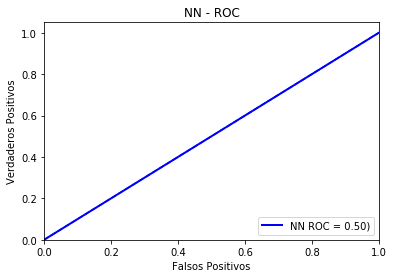

In [51]:
plt.figure()
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('NN - ROC')
plt.plot(fpr, tpr, color='blue', lw=2, label='NN ROC = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

In [47]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test, y_pred, average='macro', beta=0.5)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.015988588749995918

In [48]:
fbeta_score(y_test, y_pred, average='micro', beta=0.5)

0.0915861639139919

In [49]:
fbeta_score(y_test, y_pred, average='weighted', beta=0.5)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.010250334570073731

In [50]:
fbeta_score(y_test, y_pred, average=None, beta=0.5)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.11192012, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])